In [4]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
import matplotlib
import copy
import astropy.io.fits as _fits
import pandas as pd

import transformations

In [5]:
def get_dataframe_in_adapted_formatting(df):
    
    new_df = df.T.rename(columns=df.T.loc['Keyword'])
    new_df = new_df.drop('Keyword')
    
    return new_df

def add_column_size_after_rescaling(df, experiment):
    
    df['rescale_factor_' + experiment] = transformations.get_down_scale_factor(
        z = df['REDSHIFT'],
        experiment = experiment
    )
    
    df['size_after_rescaling_' + experiment] = df['NAXIS1'].values / df['rescale_factor_' + experiment].values

In [6]:
filename = '../../example_data/parameter_stat_72.csv'
chunksize = 1_000
tfr = pd.read_csv(filename, sep = ';', chunksize = chunksize, iterator = True)
df = pd.concat(tfr, ignore_index=False)

In [8]:
df = get_dataframe_in_adapted_formatting(df)

In [9]:
# Select columns with string data type
string_columns = df.select_dtypes(include='object').columns

not_desired_columns = ['SIMPLE', 'EXTEND', 'ORIGIN', 'EXTNAME', 'SIMTAG', 'BUNIT', 'CTYPE1', 'CTYPE2', 'CAMERA', 'COSMO', 'FILTER']
string_columns = [key for key in string_columns if key not in not_desired_columns]
print(string_columns)
# Convert selected columns to float data type
df[string_columns] = df[string_columns].astype(float)

['BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'SNAPNUM', 'SUBHALO', 'INCL', 'AZIM', 'ROLL', 'REDSHIFT', 'NPACKET', 'WLPIVOT', 'FOVSIZE', 'CRPIX1', 'CRVAL1', 'CDELT1', 'CRPIX2', 'CRVAL2', 'CDELT2']


In [11]:
df

,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,EXTNAME,ORIGIN,SIMTAG,SNAPNUM,...,BUNIT,FOVSIZE,CRPIX1,CRVAL1,CDELT1,CTYPE1,CRPIX2,CRVAL2,CDELT2,CTYPE2
shalo_072-299394_v1_photo.fits,True,-32.0,2.0,1464.0,1464.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,AB mag/arcsec2,146.342641,732.0,0.0,0.099961,kpc,732.0,0.0,0.099961,kpc
shalo_072-119154_v1_photo.fits,True,-32.0,2.0,657.0,657.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,AB mag/arcsec2,65.620522,328.5,0.0,0.099879,kpc,328.5,0.0,0.099879,kpc
shalo_072-435665_v1_photo.fits,True,-32.0,2.0,500.0,500.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,AB mag/arcsec2,50.000000,250.0,0.0,0.100000,kpc,250.0,0.0,0.100000,kpc
shalo_072-501692_v1_photo.fits,True,-32.0,2.0,1012.0,1012.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,AB mag/arcsec2,101.108235,506.0,0.0,0.099909,kpc,506.0,0.0,0.099909,kpc
shalo_072-194862_v3_photo.fits,True,-32.0,2.0,536.0,536.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,AB mag/arcsec2,53.532837,268.0,0.0,0.099875,kpc,268.0,0.0,0.099875,kpc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shalo_072-552253_v3_photo.fits,True,-32.0,2.0,698.0,698.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,AB mag/arcsec2,69.777388,349.0,0.0,0.099968,kpc,349.0,0.0,0.099968,kpc
shalo_072-531318_v3_photo.fits,True,-32.0,2.0,812.0,812.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,AB mag/arcsec2,81.167338,406.0,0.0,0.099960,kpc,406.0,0.0,0.099960,kpc
shalo_072-542037_v2_photo.fits,True,-32.0,2.0,890.0,890.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,AB mag/arcsec2,88.947262,445.0,0.0,0.099941,kpc,445.0,0.0,0.099941,kpc
shalo_072-570727_v3_photo.fits,True,-32.0,2.0,757.0,757.0,True,CFHT_MEGACAM.U,SKIRT 9 Simulation,TNG50-1,72.0,...,AB mag/arcsec2,75.680927,378.5,0.0,0.099975,kpc,378.5,0.0,0.099975,kpc


In [12]:
add_column_size_after_rescaling(df, 'HSC')

array([[<AxesSubplot:title={'center':'NAXIS1'}>]], dtype=object)

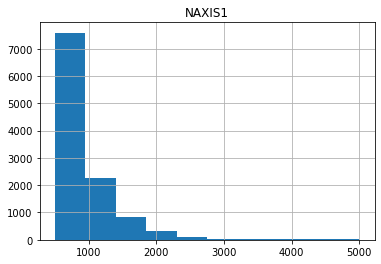

In [13]:
df.hist('NAXIS1')

array([[<AxesSubplot:title={'center':'size_after_rescaling_HSC'}>]],
      dtype=object)

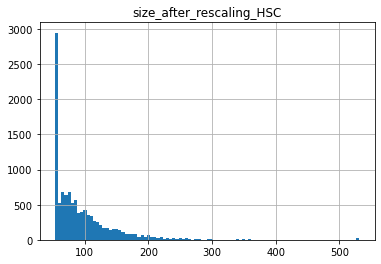

In [14]:
df.hist('size_after_rescaling_HSC', bins = 'auto')

In [15]:
df['size_after_rescaling_HSC'].min()

53.11699733374046